## Outlier and Anomalies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Outlier adalah data yang nilainya berbeda secara ekstrem jika dibandingkan dengan mayoritas nilai data lainnya, bukan berasal dari error
- Sedangkan anomali berasal dari error.

Cohtoh pada umur:
- Outlier: pada data sekumpulan usia dengan range 20-30 tahun, terdapat data usia 100 tahun
- Anomali: data usia -10 atau 10000 (berasal dari kesalahan penginputan data, dll.)

### Checking Anomalies

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Checking Outliers

#### Boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


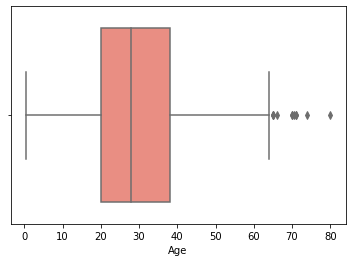

In [7]:
sns.boxplot(df['Age'], color='salmon');

**Using IQR**

- IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle. 
- An outlier is a point which falls more than 1.5 times the interquartile range above the third quantile or below the first quantile.

Step 1:
- Arrange the data in increasing order
- Calculate first (q1) and third quantile (q3)
- Find interquantile range (q3-q1)
- Find lower bound q1*1.5
- Find upper bound q3*1.5
- Anything that lies outside of lower and upper bound is an outlier

In [8]:
df_age_notnull = df['Age'][df['Age'].notnull()]

Finding first quartile and third quartile

In [9]:
q1,q3 = np.percentile(df_age_notnull,[25,75]) 
print(q1,q3)

20.125 38.0


Find the IQR which is the difference between third and first quartile

In [10]:
iqr = q3 - q1 
print(iqr)

17.875


Find lower and upper bound

In [11]:
lower_bound = q1 - (1.5*iqr) 
upper_bound = q3 + (1.5*iqr)

print(lower_bound)
print(upper_bound)

-6.6875
64.8125


Task

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


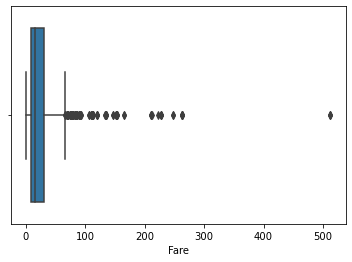

In [12]:
# Boxplot

sns.boxplot(df['Fare']);

In [13]:
df_fare_notnull = df['Fare'][df['Fare'].notnull()]

In [14]:
# Q1 dan Q3

q1f,q3f = np.percentile(df_fare_notnull,[25,75]) 
print(q1f,q3f)

7.9104 31.0


In [15]:
# IQR

iqrf = q3f - q1f 
print(iqr)

17.875


In [16]:
# Lower bound dan upper bound

lower_boundf = q1f - (1.5*iqrf) 
upper_boundf = q3f + (1.5*iqrf)

print(lower_boundf)
print(upper_boundf)

-26.724
65.6344


Task 2

In [17]:
cc = pd.read_csv('cc.csv')
cc

,Nama,Usia,TB,BB
0,Axel,20,180,60
1,Yogi,21,182,66
2,Dian,20,170,58
3,Yesaya,21,178,70
4,Dwi,21,172,50


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


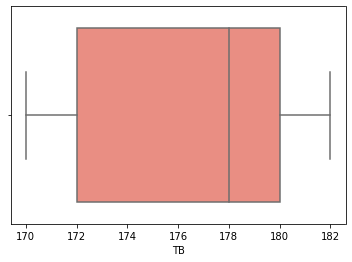

In [18]:
# Boxplot

sns.boxplot(cc['TB'], color = 'salmon');

In [19]:
# Q1 dan Q3
q1_tb,q3_tb = np.percentile(cc['TB'],[25,75]) 

# IQR
iqr_tb = q3_tb - q1_tb 

# Lower bound dan upper bound
lower_bound_tb = q1_tb - (1.5*iqr_tb) 
upper_bound_tb = q3_tb + (1.5*iqr_tb)

print('Quantile 1:', q1_tb)
print('Quantile 3:', q3_tb)
print('IQR:', iqr_tb)
print('Lower Bound:', lower_bound_tb)
print('Upper Bound:', upper_bound_tb)

Quantile 1: 172.0
Quantile 3: 180.0
IQR: 8.0
Lower Bound: 160.0
Upper Bound: 192.0


Menggunakan excel:

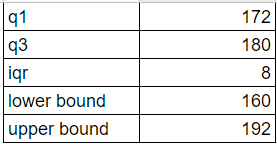

## Anomalies and Outliers Handling

**Handling Outliers**

In [20]:
df_age_new = df['Age'][(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
print(df_age_new)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 703, dtype: float64


In [21]:
df_age_new.describe()

count    703.000000
mean      29.072077
std       13.728478
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       64.000000
Name: Age, dtype: float64

In [22]:
df_age_new

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 703, dtype: float64

Task

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
df_fare_new = df['Fare'][(df['Fare'] > lower_boundf) & (df['Fare'] < upper_boundf)]
print(df_fare_new)

0       7.2500
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 775, dtype: float64


In [25]:
df_fare_new.describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

## Handling Missing Values

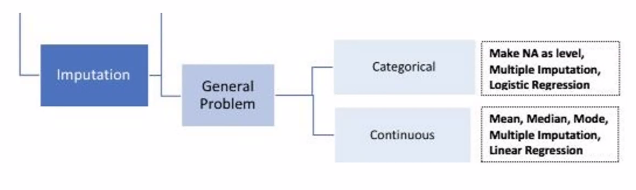

- Data kurtosis (runcing) -> dihandle menggunakna mean
- Data skew (menceng) -> dihandle menggunakna median

**Numerical**

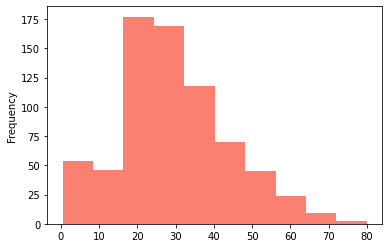

In [26]:
df['Age'].plot(kind='hist', color="salmon");

In [27]:
val = df['Age'].median()
df['Age'] = df['Age'].fillna(val)

In [28]:
df['Age'].isna().sum()

0

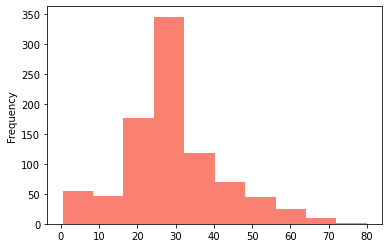

In [29]:
df['Age'].plot(kind='hist', color="salmon");

**Categorical**

In [30]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
df['Embarked'].isna().sum()

2

In [32]:
val = df['Embarked'].mode().values[0]
df['Embarked'] = df['Embarked'].fillna(val)

In [33]:
df['Embarked'].isna().sum()

0

In [34]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Kolom `Cabin` memiliki terlalu banyak missing value, jadi tidak dilakukan imputasi tetapi drop column

### Handling Missing Value (Imputation)

In [41]:
cc2 = pd.read_csv('cc2.csv')
cc2

,Nama,TB,BB,Gender
0,Axel,NaN,60.0,L
1,Yogi,182.0,66.0,L
2,Dian,170.0,NaN,P
3,Yesaya,178.0,70.0,L
4,Dwi,172.0,50.0,NaN


#### Numerical

Imputasi kolom TB

In [42]:
cc2['TB'].isna().sum()

1

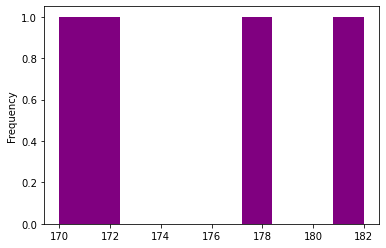

In [43]:
cc2['TB'].plot(kind='hist', color="purple");

In [44]:
val = cc2['TB'].median()
cc2['TB'] = cc2['TB'].fillna(val)

In [46]:
cc2['TB'].isna().sum()

0

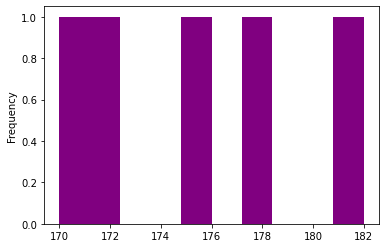

In [47]:
cc2['TB'].plot(kind='hist', color="purple");

In [48]:
cc2

,Nama,TB,BB,Gender
0,Axel,175.0,60.0,L
1,Yogi,182.0,66.0,L
2,Dian,170.0,NaN,P
3,Yesaya,178.0,70.0,L
4,Dwi,172.0,50.0,NaN


#### Categorical

In [36]:
cc2['Gender'].value_counts()

L    3
P    1
Name: Gender, dtype: int64

In [49]:
cc2['Gender'].isna().sum()

1

In [50]:
val = cc2['Gender'].mode().values[0]
cc2['Gender'] = cc2['Gender'].fillna(val)

In [51]:
cc2['Gender'].isna().sum()

0

In [52]:
cc2['Gender'].value_counts()

L    4
P    1
Name: Gender, dtype: int64

In [53]:
cc2

,Nama,TB,BB,Gender
0,Axel,175.0,60.0,L
1,Yogi,182.0,66.0,L
2,Dian,170.0,NaN,P
3,Yesaya,178.0,70.0,L
4,Dwi,172.0,50.0,L
